# Script Outline

### 1. Importing visualization libraries and the cleaned dataset
### 2. Picking out variables from the questions for exploratory visual analysis
### 3. Creating a correlation matrix heatmap to discuss what the coefficients mean in terms of the relationships
### 4. Creating a scatterplot for the variables with the strongest correlations to examine the relationships
### 5. Creating a pair plot to comment on the distribution and explore further the selected variables
### 6. Creating a categorical plot and interpreting the results.
### 7. Answering the questions 
### 8. Defining any hypotheses to be tested later on
--------------------------------------------------------------------------------------------------------------------

### 1. Importing visualization libraries and the cleaned dataset
--------------------------------------------------------------------------------------------------------------------

In [105]:
# Visualization libraries and further

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import scipy

In [106]:
matplotlib.__version__

'3.3.4'

In [107]:
# Defining a short project folder to import the dataset

path = r'/Volumes/GoogleDrive/My Drive/Career Foundry/2 Data Immersion/Achievement 6 - Advanced Analytics/Task 6.1/Datasets'

In [108]:
path

'/Volumes/GoogleDrive/My Drive/Career Foundry/2 Data Immersion/Achievement 6 - Advanced Analytics/Task 6.1/Datasets'

In [109]:
# Cleaned dataset

df_eco_all_countries_ll = pd.read_csv(os.path.join(path, 'df_eco_all_countries_ll.csv'))


In [110]:
df_eco_all_countries_ll.shape

(5152, 19)

In [111]:
df_eco_all_countries_ll.head()

,All,Unique ID,Country,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,0,1,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,1,2,Barbados,13.193887,-59.543198,2022,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,2,3,Belize,17.189877,-88.497650,2022,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,3,4,Bolivia,-16.290154,-63.588653,2022,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,4,5,Brazil,-14.235004,-51.925280,2022,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


In [112]:
df_eco_all_countries_ll.columns

Index(['All', 'Unique ID', 'Country', 'Latitude', 'Longitude', 'Index Year',
       'Overall Score', 'Property Rights', 'Government Integrity',
       'Judicial Effectiveness', 'Tax Burden', 'Government Spending',
       'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom'],
      dtype='object')

In [113]:
df_eco_all_countries_ll.dtypes

All                         int64
Unique ID                   int64
Country                    object
Latitude                  float64
Longitude                 float64
Index Year                  int64
Overall Score             float64
Property Rights           float64
Government Integrity      float64
Judicial Effectiveness    float64
Tax Burden                float64
Government Spending       float64
Fiscal Health             float64
Business Freedom          float64
Labor Freedom             float64
Monetary Freedom          float64
Trade Freedom             float64
Investment Freedom        float64
Financial Freedom         float64
dtype: object

## 2. Picking out variables from the questions for exploratory visual analysis
--------------------------------------------------------------------------------------------------------------------

In [114]:
# Check for missing values

df_eco_all_countries_ll.isnull().sum()

# Judicial Effectiveness and Fiscal Health are 2 factors that there are more missing values. 

All                          0
Unique ID                    0
Country                      0
Latitude                     0
Longitude                    0
Index Year                   0
Overall Score              534
Property Rights            497
Government Integrity       481
Judicial Effectiveness    4053
Tax Burden                 518
Government Spending        502
Fiscal Health             4060
Business Freedom           485
Labor Freedom             1979
Monetary Freedom           496
Trade Freedom              511
Investment Freedom         496
Financial Freedom          518
dtype: int64

In [115]:
# Finding duplicates

df_eco_all_countries_ll_dups = df_eco_all_countries_ll[df_eco_all_countries_ll.duplicated()]

In [116]:
df_eco_all_countries_ll_dups

## No duplicates values found.

,All,Unique ID,Country,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom


In [118]:
# Renaming columns

df_eco_all_countries_ll.rename(columns = {'Index Year' : 'Year'}, inplace = True)

In [135]:
# Creating a subset - removing "All, Unique ID, Year, Overall Score, Latitude', 'Longitude"

sub_df_eco_all_countries_ll = df_eco_all_countries_ll[['Country', 'Property Rights', 
'Government Integrity', 'Judicial Effectiveness', 'Tax Burden', 'Government Spending', 'Fiscal Health',
'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom', 'Financial Freedom']]

In [136]:
sub_df_eco_all_countries_ll.head()

,Country,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Argentina,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,Barbados,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,Belize,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,Bolivia,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,Brazil,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


## 3. Creating a correlation matrix heatmap to discuss what the coefficients mean in terms of the relationships
--------------------------------------------------------------------------------------------------------------------

In [137]:
sub_df_eco_all_countries_ll.corr()

,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
Property Rights,1.000000,0.848994,0.846305,-0.125893,-0.284994,0.259210,0.728725,0.369568,0.405262,0.405772,0.668867,0.675836
Government Integrity,0.848994,1.000000,0.848180,-0.132510,-0.372150,0.235535,0.694464,0.357473,0.435541,0.468148,0.582793,0.619461
Judicial Effectiveness,0.846305,0.848180,1.000000,-0.167709,-0.260415,0.197891,0.708328,0.442639,0.441072,0.511242,0.576197,0.612944
Tax Burden,-0.125893,-0.132510,-0.167709,1.000000,0.436554,0.043464,0.055398,0.214396,0.199652,0.227582,-0.028176,0.030521
Government Spending,-0.284994,-0.372150,-0.260415,0.436554,1.000000,0.104650,-0.182691,-0.023680,0.022189,-0.149717,-0.126087,-0.128432
Fiscal Health,0.259210,0.235535,0.197891,0.043464,0.104650,1.000000,0.226345,0.157942,0.274577,0.284817,0.205416,0.192373
Business Freedom,0.728725,0.694464,0.708328,0.055398,-0.182691,0.226345,1.000000,0.497293,0.396526,0.445593,0.584543,0.613960
Labor Freedom,0.369568,0.357473,0.442639,0.214396,-0.023680,0.157942,0.497293,1.000000,0.324391,0.312885,0.272501,0.326192
Monetary Freedom,0.405262,0.435541,0.441072,0.199652,0.022189,0.274577,0.396526,0.324391,1.000000,0.393873,0.428670,0.446492
Trade Freedom,0.405772,0.468148,0.511242,0.227582,-0.149717,0.284817,0.445593,0.312885,0.393873,1.000000,0.452326,0.466382


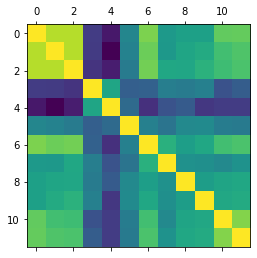

In [138]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_df_eco_all_countries_ll.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

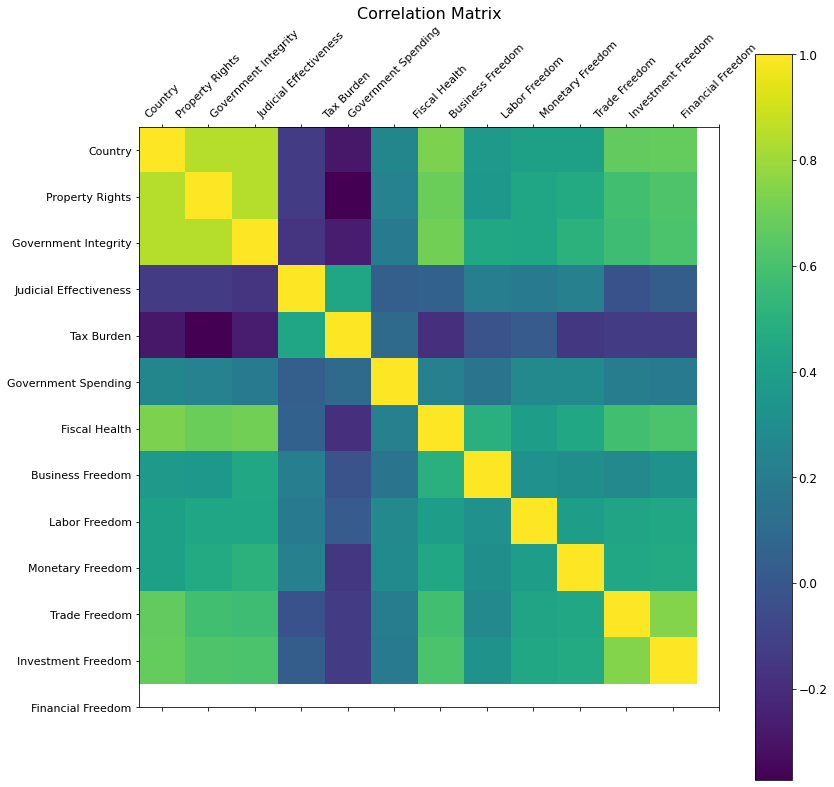

In [139]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(13, 13)) # figure size 
plt.matshow(sub_df_eco_all_countries_ll.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_df_eco_all_countries_ll.shape[1]), sub_df_eco_all_countries_ll.columns, fontsize=11, rotation=45) # x axis labels
plt.yticks(range(sub_df_eco_all_countries_ll.shape[1]), sub_df_eco_all_countries_ll.columns, fontsize=11) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=16) # add title

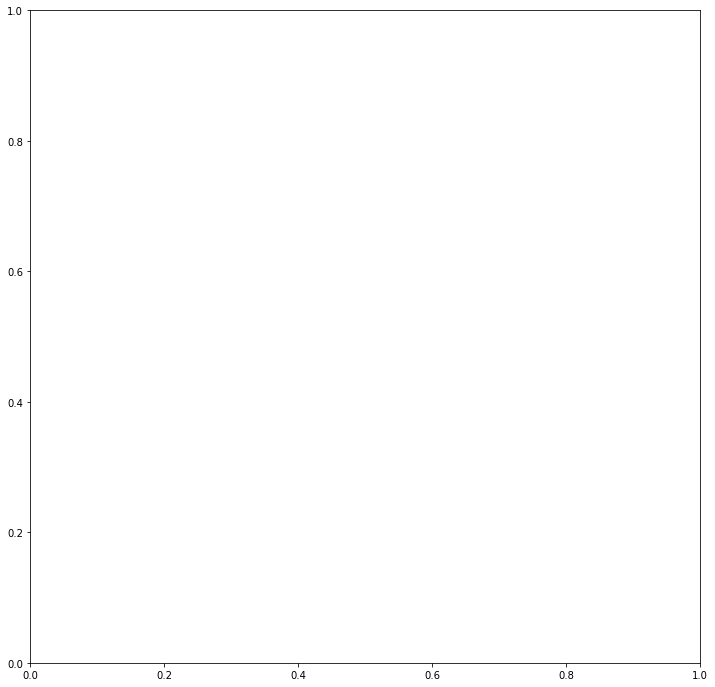

In [140]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(12,12))

In [141]:
# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub_df_eco_all_countries_ll.corr(), annot = True, ax = ax) 


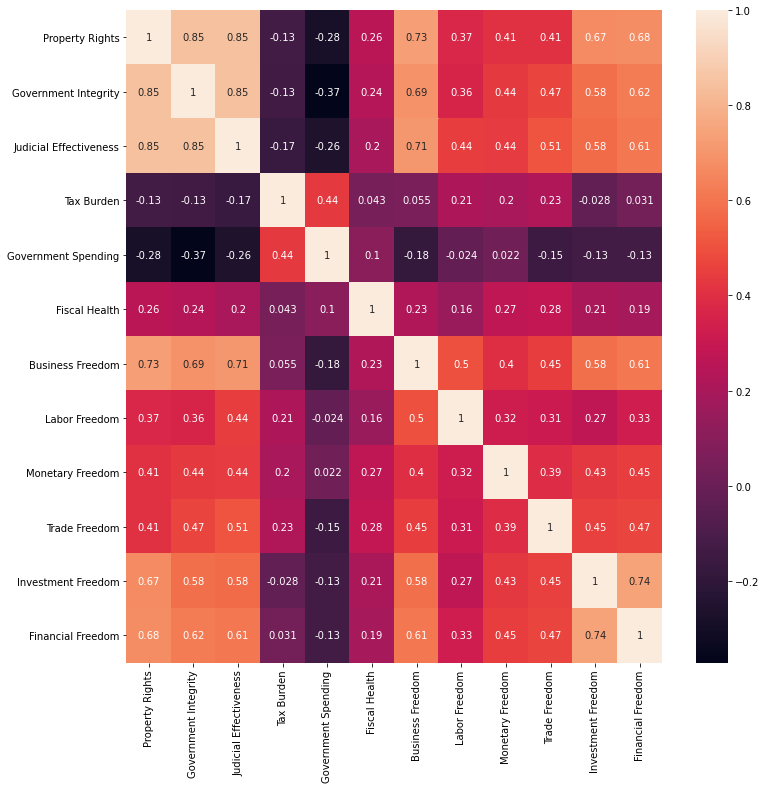

In [142]:
corr.figure

## 4. Creating a scatterplot for the variables with the strongest correlations to examine the relationships
--------------------------------------------------------------------------------------------------------------------

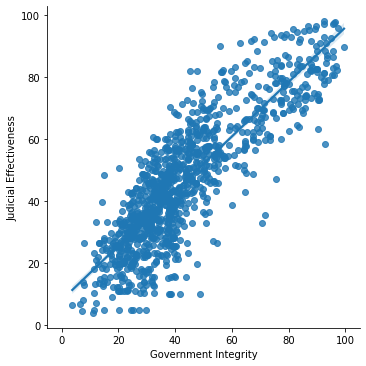

In [177]:
### Variables with strongest correlations are: Government Integrity, Judicial Effectiveness, Property Rights, 
### but with  causation are Judicial Effectiveness, Property Rights

sns.lmplot(x = 'Government Integrity', y = 'Judicial Effectiveness', data = sub_df_eco_all_countries_ll)

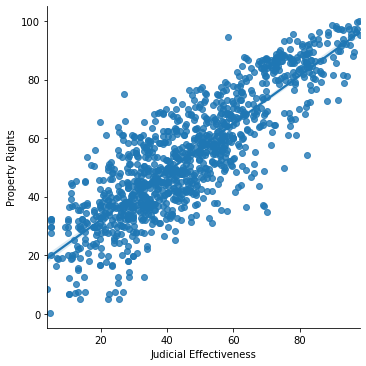

In [144]:
sns.lmplot(x = 'Judicial Effectiveness', y = 'Property Rights', data = sub_df_eco_all_countries_ll)

## 5. Creating a pair plot to comment on the distribution and explore further the selected variables
--------------------------------------------------------------------------------------------------------------------

In [196]:
# Further variables to use

sub_2_df_eco_all_countries_ll = sub_df_eco_all_countries_ll[['Government Integrity', 'Judicial Effectiveness', 'Property Rights']]

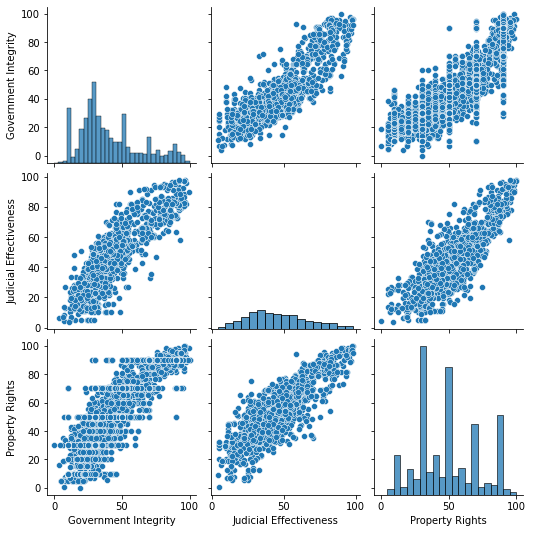

In [197]:
g = sns.pairplot(sub_2_df_eco_all_countries_ll)

## 6. Creating a categorical plot and interpreting the results.
--------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Government Integrity', ylabel='Density'>

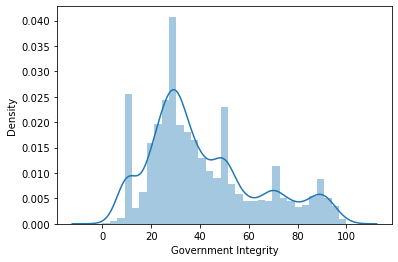

In [198]:
sns.distplot(sub_2_df_eco_all_countries_ll['Government Integrity'], bins = 33)


In [199]:
sub_2_df_eco_all_countries_ll.loc[sub_2_df_eco_all_countries_ll['Government Integrity'] < 33, 'Integrity Category'] = 'Low Integrity'

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [200]:
sub_2_df_eco_all_countries_ll.loc[(sub_2_df_eco_all_countries_ll['Government Integrity'] >= 33) & (sub_2_df_eco_all_countries_ll['Government Integrity'] < 66), 'Integrity Category'] = 'Middle Integrity'


/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [201]:
sub_2_df_eco_all_countries_ll.loc[sub_2_df_eco_all_countries_ll['Government Integrity'] >= 66, 'Integrity Category'] = 'High Integrity'


/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [202]:
sub_2_df_eco_all_countries_ll['Integrity Category'].value_counts(dropna = False)

Low Integrity       2142
Middle Integrity    1716
High Integrity       813
NaN                  481
Name: Integrity Category, dtype: int64

## 7. Answering the questions
--------------------------------------------------------------------------------------------------------------------

In [ ]:
## Questions to guide an open analysis project
#### -- How do the indexes of economic freedom change overtime?
#### -- What factors do free and repressed countries have in common?
#### -- What factors have changed the most and in what countries?

--------------------------------------------------------------------------------------------------------------------
## Comments about the questions and new questions
### I've notice that this task guided my to another direction different from the one I was planning to follow.
### My plan was to compare the factors among countries, but applying the correlation method, I noticed the need
### to identify the relationship among factors, then the countries left the analysis.
### Said, that, the following are the new questions that will guide my analysis

#### How much does a government's integrity impact the Judicial Effectiveness?
#### How much does the Judicial Effectiveness impact a person's property rights?

## 8. Defining any hypotheses to be tested later on
--------------------------------------------------------------------------------------------------------------------

In [ ]:
### If a government's integrity is high, then the Judicial Effectiveness is high.
### And if the Judicial Effectiveness is highm then a person's property rights is high.